<a href="https://colab.research.google.com/github/dkm4/dataloader-Multiclass-Classification/blob/main/dataloader_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do some imports

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


# Assign the device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"My device is {device}")

My device is cpu


# Build our dataset

In [ ]:
from sklearn.datasets import make_blobs

NUM_CLASSES  = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
N_SAMPLES   = 10000
x_blob, y_blob = make_blobs(n_samples = N_SAMPLES, n_features = NUM_FEATURES, centers = NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)




In [ ]:
print(f"x blob is {x_blob}")
print(f"y blob ias {y_blob}")
print(f"x blob type is {type(x_blob)}")
print(f"y blob type is {type(y_blob)}")
print(f"x blob shape is {x_blob.shape}")
print(f"y blob shape is {y_blob.shape}")

x blob is [[ -3.19868278   7.39452246]
 [ -9.09763759 -10.22462455]
 [  5.56053512   2.53635347]
 ...
 [ -7.56923928  -7.38874204]
 [ -2.04749497   6.44903354]
 [  1.93425311   2.47037603]]
y blob ias [0 2 1 ... 2 0 1]
x blob type is <class 'numpy.ndarray'>
y blob type is <class 'numpy.ndarray'>
x blob shape is (10000, 2)
y blob shape is (10000,)


# Plot my dataset

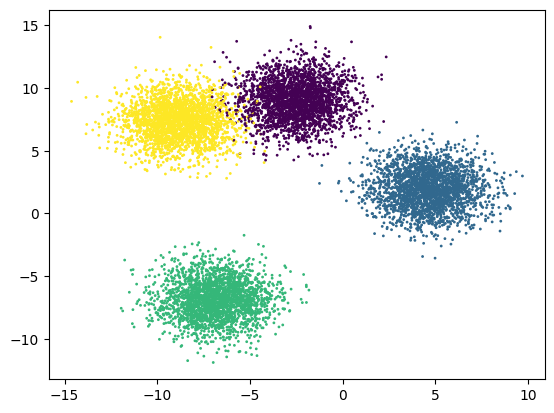

In [ ]:
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob, s=1)

# Convert these numpy to tensors

In [ ]:
X_tensor = torch.from_numpy(x_blob).type(torch.float).to(device)
#Please make sure your ytensor should be long
y_tensor = torch.from_numpy(y_blob).type(torch.long).to(device)

print(f"{X_tensor.shape} and {X_tensor.device} and {X_tensor.dtype}")
print(f"{y_tensor.shape} and {y_tensor.device} and {y_tensor.dtype}")

torch.Size([10000, 2]) and cpu and torch.float32
torch.Size([10000]) and cpu and torch.int64


# Train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.20, random_state=42)

# Plot train/test split

Information about training dataset torch.Size([8000, 2])


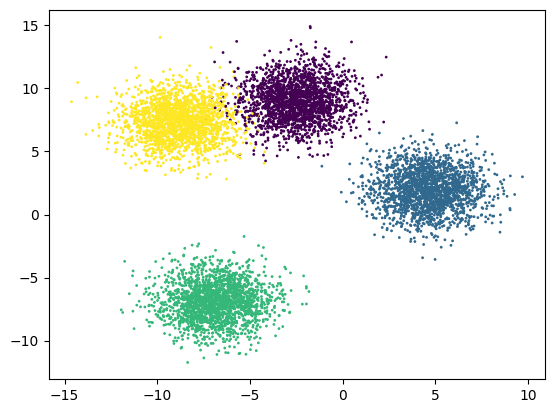

In [ ]:
print(f"Information about training dataset {X_train.shape}")
plt.scatter(X_train[:, 0].cpu(), X_train[:, 1].cpu(), c=y_train.cpu(), s=1)

Information about test dataset torch.Size([2000, 2])


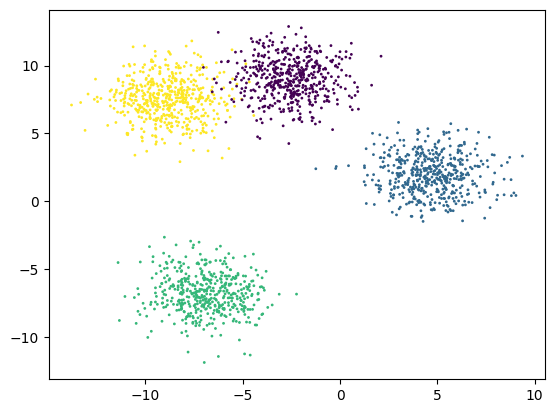

In [ ]:
print(f"Information about test dataset {X_test.shape}")
plt.scatter(X_test[:, 0].cpu(), X_test[:, 1].cpu(), c=y_test.cpu(), s=1)

# Design a Neural Network

In [ ]:
#in_features=2, out_features=4
#NN:-(1000000, 2)->(1000000, 4)
class MulticlassNN(nn.Module):
  def __init__(self, in_features, out_features, hidden_units=8):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units*2),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units*2, out_features=out_features),
    )

  def forward(self, x):
    return self.layer(x)

#build dataLoader

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


BATCH_SIZE=32
training_dataset    = CustomDataset(X_train, y_train)
testing_dataset     = CustomDataset(X_test, y_test)
training_dataloader = DataLoader(training_dataset, batch_size=BATCH_SIZE, shuffle=True)
testing_dataloader  = DataLoader(testing_dataset, batch_size=BATCH_SIZE, shuffle=False)


#see the data

In [ ]:
print(f"length of training dataset {len(training_dataset)}")
print(f"length of testing dataset {len(testing_dataset)}")
print(f"length of training dataloader {len(training_dataloader)}")
print(f"length of testing dataloader {len(testing_dataloader)}")

length of training dataset 8000
length of testing dataset 2000
length of training dataloader 250
length of testing dataloader 63


In [ ]:
model = MulticlassNN(NUM_FEATURES, NUM_CLASSES).to(device)
model

MulticlassNN(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [ ]:
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[-0.5270,  0.5419],
                      [-0.5191, -0.4863],
                      [-0.4693, -0.1627],
                      [ 0.2527,  0.1072],
                      [-0.0357,  0.5730],
                      [ 0.6908,  0.4539],
                      [-0.3297, -0.3686],
                      [-0.1415,  0.4575]])),
             ('layer.0.bias',
              tensor([-0.2416, -0.2980,  0.3182,  0.5496,  0.0749,  0.1898, -0.5362,  0.1656])),
             ('layer.2.weight',
              tensor([[ 0.1195,  0.1981, -0.0400, -0.0212, -0.0878,  0.3298,  0.3517,  0.1451],
                      [-0.3424, -0.3268,  0.0976, -0.1368,  0.3407, -0.1525, -0.3065,  0.2547],
                      [ 0.3130,  0.1681,  0.3375,  0.1170,  0.0139,  0.0711, -0.2566, -0.1542],
                      [ 0.1797, -0.2486, -0.1883,  0.2545, -0.1578,  0.2653,  0.2059, -0.0697],
                      [-0.1883,  0.3125,  0.1355, -0.2126, -0.2261,  0.1360,  0.3455, 

# Create a loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Please check if the loss function is giving some number

In [ ]:
#untrained model
random_output = model(X_tensor)
#the bug is your y_tensor is expected to be Long
print(f"dtype 1 {random_output.dtype} and dtype2 {y_tensor.dtype}")
loss_fn(random_output, y_tensor)

dtype 1 torch.float32 and dtype2 torch.int64


tensor(1.7506, grad_fn=<NllLossBackward0>)

# Start training the model

In [ ]:
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_true))*100.0
  return acc

In [ ]:
def train_step(model, training_dataloader, loss_fn, optimizer, device):
  train_loss = 0
  train_acc = 0
  model.train()
  for batch_idx, item in enumerate(training_dataloader):
    X_batch, y_batch = item
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)
    model.to(device)
    logits = model(X_batch)
    training_loss = loss_fn(logits, y_batch)
    train_loss += training_loss
    y_preds = torch.softmax(logits, dim=1).argmax(dim=1)
    training_acc = acc_fn(y_batch, y_preds)
    train_acc+=training_acc
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
  print(f"My training loss: {train_loss/len(training_dataloader)} Training acc:{train_acc/len(training_dataloader)}")

In [ ]:
def test_step(model, testing_dataloader, loss_fn, device):
  test_loss = 0
  test_acc  = 0
  model.eval()
  with torch.no_grad():
    for batch_idx, item in enumerate(testing_dataloader):
      X_batch, y_batch = item
      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)
      model.to(device)
      logits = model(X_batch)
      testing_loss = loss_fn(logits, y_batch)
      test_loss += testing_loss
      y_preds = torch.softmax(logits, dim=1).argmax(dim=1)
      testing_acc = acc_fn(y_batch, y_preds)
      test_acc+=testing_acc
  print(f"My testing loss: {test_loss/len(testing_dataloader)} Training acc:{test_acc/len(testing_dataloader)}")

In [ ]:
from tqdm.auto import tqdm
epochs = 50
for epoch in tqdm(range(epochs)):
  print(f"My epoch {epoch}\n-----------")
  train_step(model, training_dataloader, loss_fn, optimizer, device)
  test_step(model, testing_dataloader, loss_fn, device)
  print("\n\n")

  0%|          | 0/50 [00:00<?, ?it/s]

My epoch 0
-----------
My training loss: 0.09027198702096939 Training acc:97.1125
My testing loss: 0.03428838029503822 Training acc:98.75992063492063



My epoch 1
-----------
My training loss: 0.027997363358736038 Training acc:99.0125
My testing loss: 0.034332167357206345 Training acc:98.75992063492063



My epoch 2
-----------
My training loss: 0.029036838561296463 Training acc:98.975
My testing loss: 0.0604797899723053 Training acc:97.81746031746032



My epoch 3
-----------
My training loss: 0.026186872273683548 Training acc:99.075
My testing loss: 0.02992933616042137 Training acc:98.80952380952381



My epoch 4
-----------
My training loss: 0.024776460602879524 Training acc:99.0625
My testing loss: 0.027185548096895218 Training acc:98.85912698412699



My epoch 5
-----------
My training loss: 0.025342263281345367 Training acc:99.1625
My testing loss: 0.02849140577018261 Training acc:98.85912698412699



My epoch 6
-----------
My training loss: 0.02485835738480091 Training acc:99.0

KeyboardInterrupt: 